In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

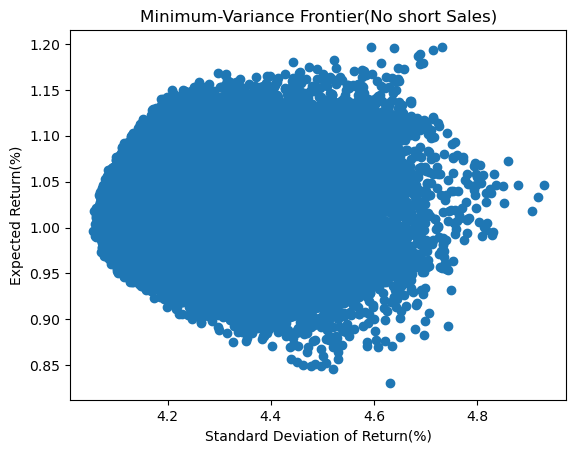

In [4]:
#part 1 Minmum-Tracing-Error Frontier
#
#
#parameters setting
filename_industry_portfolios = "Exam_Industries.xlsx"


# df_market_portfolio = pd.read_csv(filename_market_portfolio, index_col=0)
# df_industry_portfolios = pd.read_csv(filename_industry_portfolios, index_col=0)
df_industry_portfolios = pd.read_excel(filename_industry_portfolios, index_col=0)



#Ri = E(Ri-Rm)
se_excess_returns = df_industry_portfolios.apply(np.mean)

df_covs = df_industry_portfolios.cov()

V = df_covs.copy()
V_inv = pd.DataFrame(np.linalg.inv(V), columns=V.columns, index=V.index)

R = se_excess_returns
e = pd.Series([1]*len(V))
e.index = R.index

alpha = R.dot(V_inv).dot(e)
zeta = R.dot(V_inv).dot(R)
delta = e.dot(V_inv).dot(e)

R_mv = alpha/delta



#part 2 Minimum-Variance Frontier w/o Short Sales
#
#
#parameters setting
num_vectors = int(1e5)
num_samples = 5

xlabel = "Standard Deviation of Return(%)"
ylabel = "Expected Return(%)"
title = "Minimum-Variance Frontier(No short Sales)"


normalized_vectors = np.empty((num_vectors, num_samples))

cov = df_industry_portfolios.cov().to_numpy()
R = df_industry_portfolios.apply(np.mean).to_numpy()


for i in range(num_vectors):

    random_vector = np.random.rand(num_samples)


    normalized_vector = random_vector / random_vector.sum()


    normalized_vectors[i] = normalized_vector

    
lst_std = []
lst_mean = []

for w in normalized_vectors:
    #var = w*cov*w
    lst_std.append(np.sqrt(w@cov@w))
    #mean = w*R
    lst_mean.append(w@R)
    
plt.scatter(lst_std, lst_mean)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.show()

Economic significance of indifference curves

>Indifference curve consists of portfolios with same expected utility, when plotted on graph with expected return on y-axis and standard deviation of return on x-axis: (σ, µ)-space

Shape of indifference curves for risk-averse investor

>indifference curve must curve right =⇒ risk-averse
investor has convex indifference curves in (σ, µ)-space, with
higher expected utility going north

>Indifference curve will become more convex, and also more
“tilted”, for higher levels of risk aversion (since P2 must lie
further north relative to P1)

How investor can use indifference curves to find the optimal investment portfolio on frontier

>using indifference curves to identify the tangency point with the efficient frontier